# **MINI DATA SCIENCE BOOTCAMP (2/3)**
## **Part 2/3 - Limpieza, Estadistica y visualización**

### **Cargar Librarias**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Dataset**

Vamos a trabajar con el dataset **Titanic** en esta notebook. Puedes aprender mas del dataset en: https://www.kaggle.com/c/titanic/data.

#### Conectar con Google Colab y Google Drive

Baja el dataset de Titanic desde Kaggle (https://www.kaggle.com/c/titanic/data). 

Si quieres puedes seguir los pasos mencionados en el video (https://www.youtube.com/watch?v=mNTqIw-Oy44) para correr las 3 lineas siguientes.

Las lineas han sido comentadas, pero si remueves el "#" de las líneas que tienen solo 1 #.

In [ ]:
### Necesitamos cargar el conjunto de datos titanic de Google Drive en un pandas data frame
### Para obtener archivos de la unidad de Google a Colab, mount la sesión de colab del Google Drive
#from google.colab import drive

### esto solicitará autorización
#drive.mount('/content/drive')

In [ ]:
 !ls '/content/drive/MyDrive/Colab Notebooks/Mini data camp/data titanic'

gender_submission.csv  test.csv  train.csv


In [ ]:
train_drive = '/content/drive/MyDrive/Colab Notebooks/Mini data camp/data titanic/train.csv'

#### **Cargando csvs en Pandas**

Reutilizaremos los datos del Titanic de una fuente pública. Dado que está comprimido en el repositorio de Kaggle, es necesario descomprimirlo antes de vincularlo en Pandas. 

In [ ]:
train_drive = '/content/drive/MyDrive/Colab Notebooks/Mini data camp/data titanic/train.csv'

In [ ]:
#Ubique el archivo en la pestaña izquierda debajo de 'Archivos' (actualice si es necesario), y haga clic con el botón derecho - copiar la ruta. Péguelo en la sección del nombre de archivo a continuación.
df = pd.read_csv(train_drive)
print("(rows,columns)")
df.shape

(rows,columns)


(891, 12)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Resumen de los valores de las columnas

Survived: Survived (1) or died (0)

Pclass: Passenger’s class

Name: Passenger’s name

Sex: Passenger’s sex

Age: Passenger’s age

SibSp: Number of siblings/spouses aboard

Parch: Number of parents/children aboard

Ticket: Ticket number

Fare: Fare

Cabin: Cabin

Embarked: Port of embarkation

#### Manejo de valores nulos

Hay 3 formas de trabajar con valores nulos (null)

1.   Remover las filas nulas (NaN)
2.   Establecer un valor codificado rígido a los NaN 
3.   Imputar valores de NaN basados ​​en otras filas 




.any() - The any() method returns True if any element of an iterable is True. If not, any() returns False.

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Encuentra columnas con Nans en ellas. 
print("Columns with missing values: ")
print(df.columns[df.isnull().any()].tolist())

Columns with missing values: 
['Age', 'Cabin', 'Embarked']


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Obtiene los recuentos de los valores  Nan 
print("Missing Value Count - " + str(len(df)) + " rows")
print("Age: " + str(df['Age'].isna().sum()))
print("Cabin: " + str(df['Cabin'].isna().sum()))
print("Embarked: " + str(df['Embarked'].isna().sum()))

Missing Value Count - 891 rows
Age: 177
Cabin: 687
Embarked: 2


** Dado que Embarked tiene solo 2 filas NaN, eliminemos las filas con los valores faltantes **

In [ ]:
data_frame = df.dropna()

In [ ]:
data_frame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
data_frame.shape

(183, 12)

In [ ]:
#Elimina los NA's - Eliminemos las filas donde Embarked es null
print("Before dropping - " + str(len(df)) + " rows")
df = df[~df['Embarked'].isna()]
print("After dropping - " + str(len(df)) + " rows")

Before dropping - 891 rows
After dropping - 889 rows


** Dado que Cabin tiene muchos valores vacíos, imputemos su valor con el valo de Cabin más frecuente **
value_counts (): La función Pandas Index.value_counts () devuelve un objeto que contiene recuentos de valores únicos. El resultado estará en orden descendente de modo que el primer elemento sea el elemento que ocurra con más frecuencia. https://www.geeksforgeeks.org/python-pandas-index-value_counts/

idxmax(): Devuelve el index(índice) de la primera aparición del máximo sobre el eje solicitado.

In [ ]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
A34            1
C86            1
E49            1
E38            1
A10            1
Name: Cabin, Length: 146, dtype: int64

In [ ]:
#Imputamos los NA's - Dado que Cabin se encuentra mayormente vacio, se le van a imputar los valores, con los valores mas frecuentes
most_frequent_cabin = df['Cabin'].value_counts().idxmax()
print("Most Frequent Cabin = " + most_frequent_cabin)
print("NA count before fill = " + str(len(df[df['Cabin'].isna()])))
df['Cabin'] = df['Cabin'].fillna(most_frequent_cabin)
print("NA count after fill = " + str(len(df[df['Cabin'].isna()])))

Most Frequent Cabin = G6
NA count before fill = 687
NA count after fill = 0


**Dado que la edad es numérica, imputemos su valor  con la edad media de los pasajeros del barco.**

fillna(): DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs). https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

In [ ]:
#Imputamos NA - Dado que la edad es numérica, imputemos su valor  con la edad media del datset
mean_age = df['Age'].mean()
print("Mean age of passengers = " + str(mean_age))
print("NA count before fill = " + str(len(df[df['Age'].isna()])))
df['Age'] = df['Age'].fillna(mean_age)
print("NA count after fill = " + str(len(df[df['Age'].isna()])))

Mean age of passengers = 29.64209269662921
NA count before fill = 177
NA count after fill = 0


#### Estadisticas Descriptivas

Qué son las estadisticas descriptivas?

Las estadísticas descriptivas son el resumen de un conjunto de datos dado, que puede ser una representación de la totalidad o una muestra de una población.

Las estadísticas descriptivas se dividen en medidas de tendencia central y medidas de variabilidad (dispersión). Las medidas de tendencia central incluyen la media, la mediana y la moda, mientras que las medidas de variabilidad incluyen la desviación estándar, la varianza, las variables mínima y máxima, y ​​la curtosis y la asimetría.



** Observemos si los tipos de datos de los datos e infieramos si son de naturaleza numérica o categórica **

Nota:  : Siempre comprueba los tipos de etiquetas. Se pueden cambiar el tipo usando. astype() - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


** Todas las columnas son de naturaleza numérica. Las columnas int64 son indicativas de que podría ser una columna categórica. Para estar seguros, tengamos una idea del número de valores únicos en cada columna para saber qué columnas son de naturaleza nominal / categórica y qué columnas son de naturaleza numérica. **
Al trabajar con estadísticas, es importante reconocer los diferentes tipos de datos: numéricos (discretos y continuos), categóricos y ordinales.

La mayoría de los datos se dividen en uno de dos grupos: numéricos o categóricos.

Los datos numéricos se pueden dividir en dos tipos: discretos y continuos.


https://www.dummies.com/education/math/statistics/types-of-statistical-data-numerical-categorical-and-ordinal/.
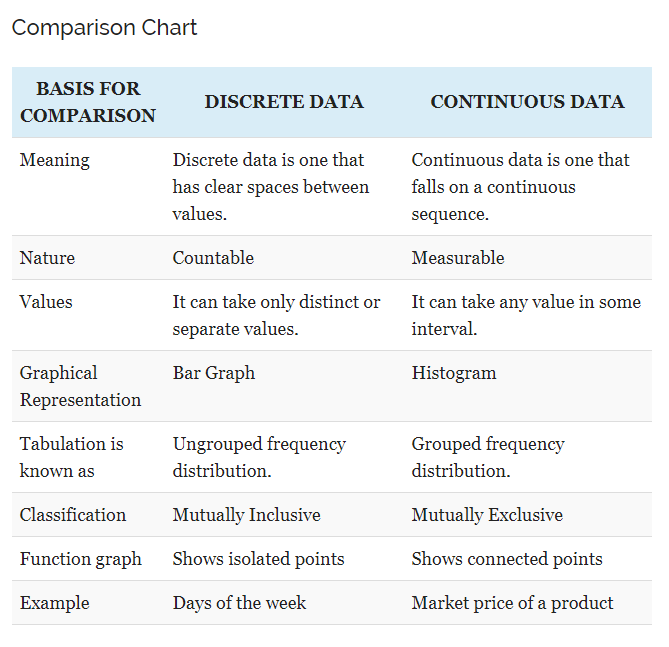

Nota: Comprender los datos continuos y discretos es muy importante cuando se profundiza en el aprendizaje automático al elegir diferentes modelos y algoritmos.

In [ ]:
print("Unique Value Count:")
cols = df.columns.tolist()
for col in cols:
  print(col + " = " + str(len(df[col].unique())))

Unique Value Count:
PassengerId = 889
Survived = 2
Pclass = 3
Name = 889
Sex = 2
Age = 89
SibSp = 7
Parch = 7
Ticket = 680
Fare = 247
Cabin = 146
Embarked = 3


** Obtenga las estadísticas de resumen en cada columna para comprender mejor la distribución **

In [ ]:
#statistical distribution
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** Para obtener una representación más visual de los números anteriores, puede usar Pandas hist para obtener el histograma de todas las columnas. **

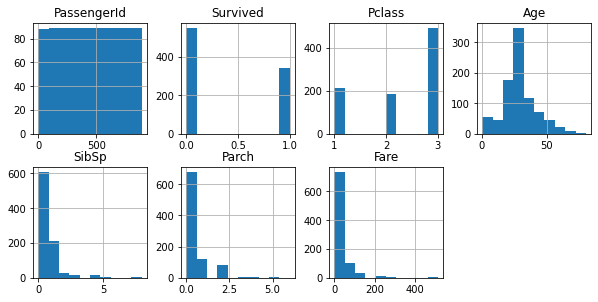

In [ ]:
hist = df.hist(figsize=(10,10),layout=(4,4))

**A partir de estos, podemos confirmar que las siguientes son columnas categóricas / nominales:**


1.   Pclass (3 valores)
2.   Survived (2 valores)
3.   Embarked (3 valores)
4.   Sex (2 valores)

** Otra forma de visualizar todas las relaciones en sus datos es utilizar el diagrama de pares de seaborn **

Seaborn pairplot(): para trazar relaciones por pares en un conjunto de datos.
https://seaborn.pydata.org/generated/seaborn.pairplot.html

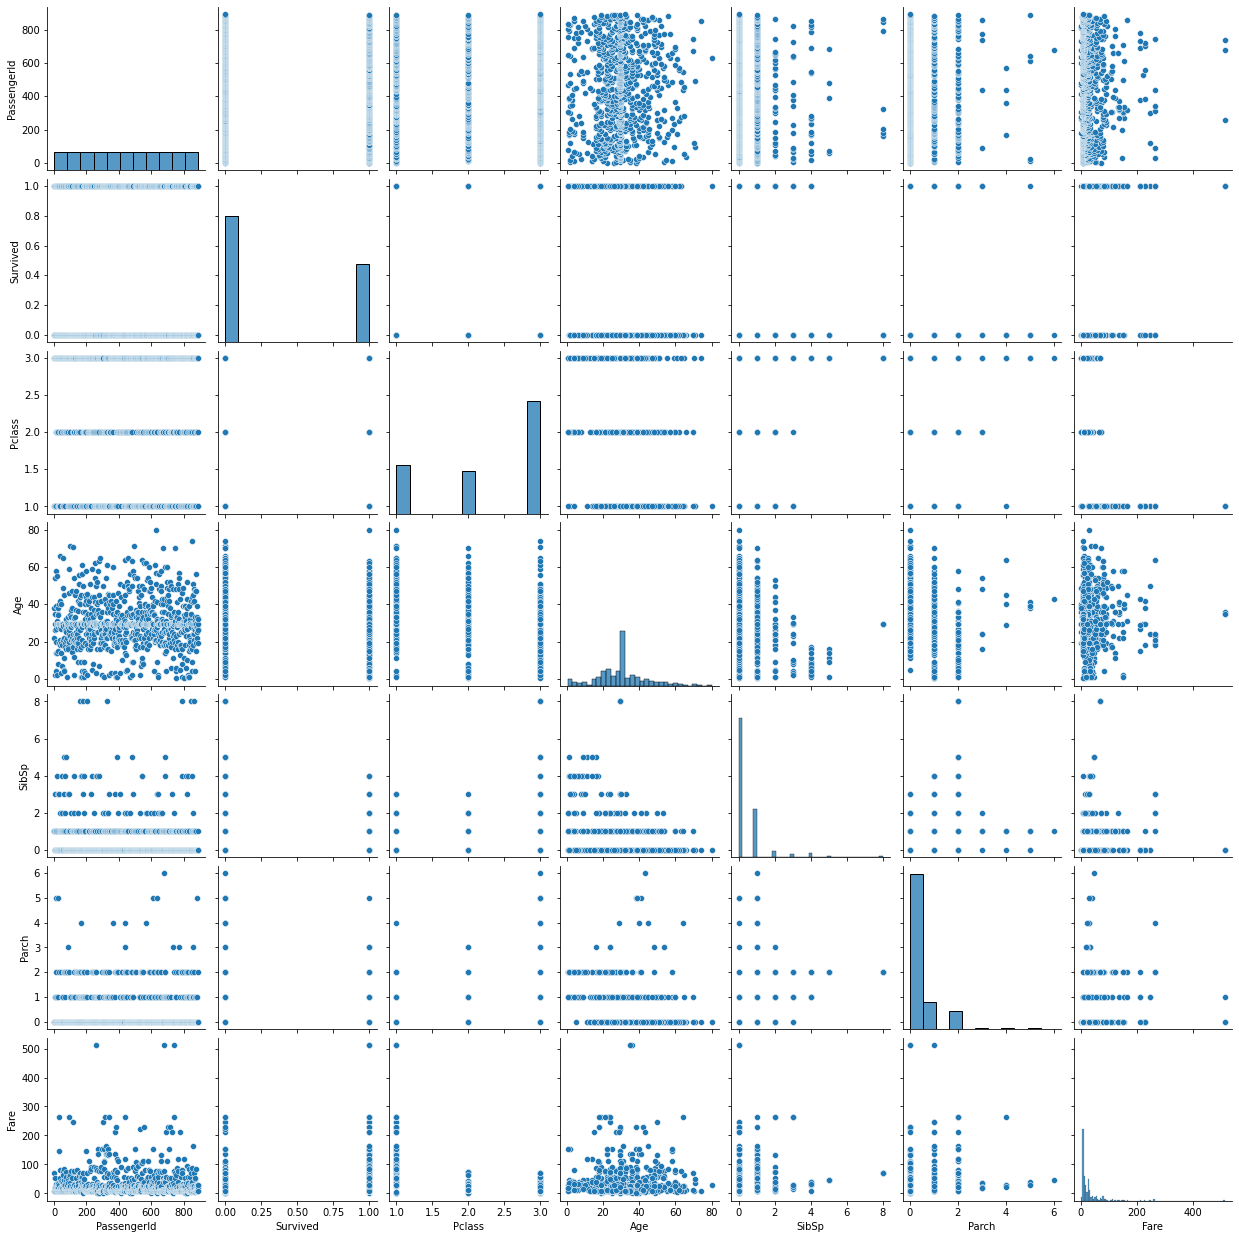

In [ ]:
sns.pairplot(df)
plt.show()

#### Correlaciones
La correlación es una técnica estadística que puede mostrar si los pares de variables están relacionados y con qué intensidad. Va de -1 a 1.

Referencias:

https://www.surveysystem.com/correlation.htm

https://www.youtube.com/watch?v=lVOzlHx_15s

In [ ]:
#correlaciones
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030335,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074513,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.328256,0.081656,0.016824,-0.548193
Age,0.030335,-0.074513,-0.328256,1.000000,-0.231908,-0.178013,0.088780
SibSp,-0.057686,-0.034040,0.081656,-0.231908,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178013,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088780,0.160887,0.217532,1.000000


**Correlaciones en el dataset Titanic:**

1. Pclass y Fare
2. Age y Parch
3. Age y SibSp
4. Age y Pclass
5. Pclass y Survived

**Correlación vs. Causalidad**

** Correlación** es una medida estadística que describe el tamaño y la dirección de una relación entre dos o más variables. Sin embargo, una correlación entre variables no significa automáticamente que el cambio en una variable sea la causa del cambio en los valores de la otra variable.

**Causalidad** indica que un evento es el resultado de la ocurrencia del otro evento; es decir, existe una relación causal entre los dos eventos. Esto también se conoce como causa y efecto.

Teóricamente, la diferencia entre los dos tipos de relaciones es fácil de identificar: una acción u ocurrencia puede causar otra (por ejemplo, fumar provoca un aumento en el riesgo de desarrollar cáncer de pulmón), o puede correlacionarse con otra (por ejemplo, fumar se correlaciona con el alcoholismo, pero no causa alcoholismo). En la práctica, sin embargo, sigue siendo difícil establecer claramente la causa y el efecto, en comparación con el establecimiento de una correlación.

 Referencia - https://www.abs.gov.au/websitedbs/a3121120.nsf/home/statistical+language+-+correlation+and+causation

**Correlación espuria**

Puedes encontrar ejemplos de correlaciones espureas (alta correlación pero sin causalidad)
 en https://www.tylervigen.com/spurious-correlations

#### Ingeniería de atributos(feature)

El proceso de creación de atributos(feature) personalizadas (/ columnas) en un conjunto de datos basado en una o más columnas se denomina ingeniería de atributos(feature).

**¿Cuántos familiares tenía el pasajero a bordo?**

In [ ]:
#Hay 2 columnas: SibSp y Parch. Si combinamos ambas, se obtiene el número total de familiares a bordo.
df['RelativeCount'] = df['SibSp'] + df['Parch']
df['RelativeCount'].describe()

count    889.000000
mean       0.906637
std        1.614703
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: RelativeCount, dtype: float64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativeCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,0


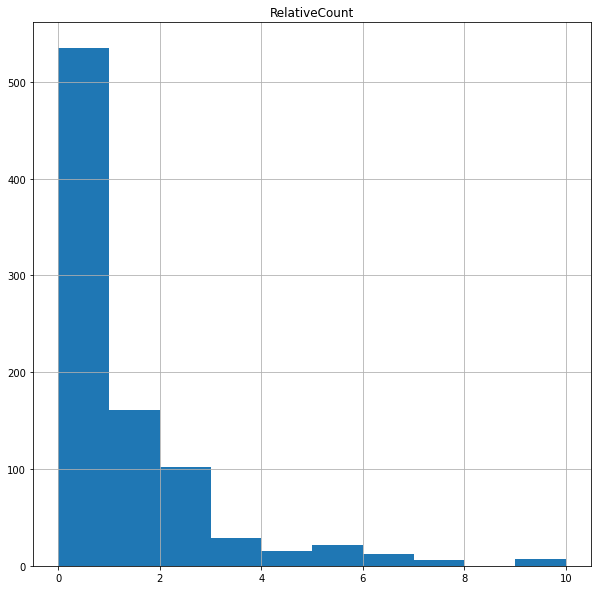

In [ ]:
# Miremos la variable en un grafico
#Como la variable es numerica, se hace un histograma
hist = df.hist(figsize=(10,10),column='RelativeCount')

# **Habia pasajeros que viajaban solos?**

numpy.where(): Return elements chosen from x or y depending on condition.
https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

In [ ]:
#Viajaba solo
df['TravelAlone'] = np.where(df['SibSp']+df['Parch']>0, "No", "Yes")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativeCount,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,0,Yes


In [ ]:
df['TravelAlone'].value_counts()

Yes    535
No     354
Name: TravelAlone, dtype: int64

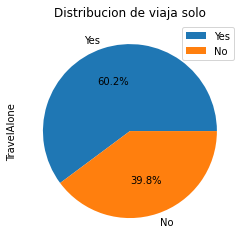

In [ ]:
#En forma grafica
#Como la variable es categorica, hacemos un  pie chart
pie = df['TravelAlone'].value_counts().plot(kind="pie",title='Distribucion de viaja solo',legend=True,autopct='%1.1f%%')

**Agrupando o clasificando la edad**

Si hay demasiados valores numéricos en una columna, es común agrupar estos valores numéricos en grupos más pequeños. Esto convierte un conjunto de datos numéricos en categórico. 

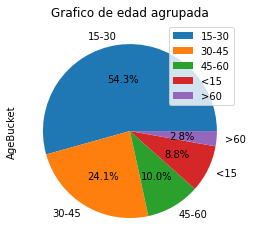

In [ ]:
#Ingenieria de atributos!
def bucket_age(age):
  if age < 15:
    return "<15"
  if age >= 15 and age < 30:
    return "15-30"
  if age >=30 and age < 45:
    return "30-45"
  if age>=45 and age < 60:
    return "45-60"
  return ">60"

df['AgeBucket'] = df['Age'].apply(bucket_age)

#Graficamos en un pie chart
pie = df['AgeBucket'].value_counts().plot(kind="pie",title='Grafico de edad agrupada',legend=True,autopct='%1.1f%%')

#### Visualizacion

La manera mas facil de entender los datos y formular hipotesis es mediante la visualizacion de los datos.
En esta seccion muestra como visualizar los datos.

##### Distribucion de los datos


**Como la variable Pclass se relaciona con la tasa de supervivencia?**

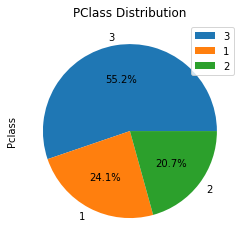

In [ ]:
#Empecemos con un grafico para ver la distribucion de la variable Pclass
pie = df['Pclass'].value_counts().plot(kind="pie",title='PClass Distribution',legend=True,autopct='%1.1f%%')

In [ ]:
df.groupby(['Pclass','Survived']).size().unstack()

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


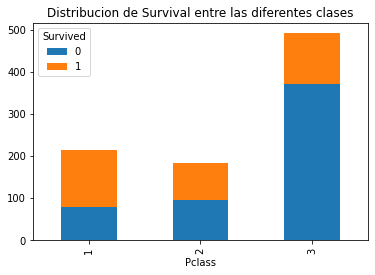

In [ ]:
#Cual es la tasa de supervivencia entre las diferentes clases?
df.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar',stacked=True,title="Distribucion de Survival entre las diferentes clases")
ax = plt.show()

**Las variables Pclass y Sex se encuentran relacionadas?**

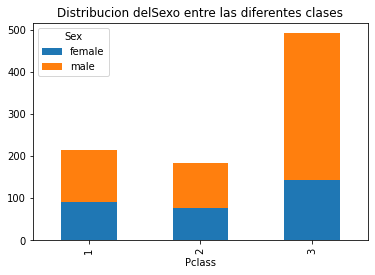

In [ ]:
#Como se encuentra la variable sex distribuida entre clases?
df.groupby(['Pclass','Sex']).size().unstack().plot(kind='bar',stacked=True,title="Distribucion delSexo entre las diferentes clases")
plt.show()

#####Graficos de densidad

Una gráfica de densidad es una representación de la distribución de una variable numérica. Utiliza una estimación de la densidad del kernel para mostrar la función de densidad de probabilidad de la variable. Es una versión suavizada del histograma y se utiliza en el mismo concepto. 

Estimación de la densidad del kernel (KDE): la estimación de la densidad del kernel es una herramienta estadística realmente útil con un nombre intimidante. A menudo abreviado a KDE, es una técnica que le permite crear una curva suave dado un conjunto de datos. La estimación de densidad de kernel (KDE) es una forma de estimar la función de densidad de probabilidad de una variable aleatoria continua. Se utiliza para análisis no paramétricos. 

Referencia - https://www.data-to-viz.com/graph/density.html

**Relacion entre Age y Survival**

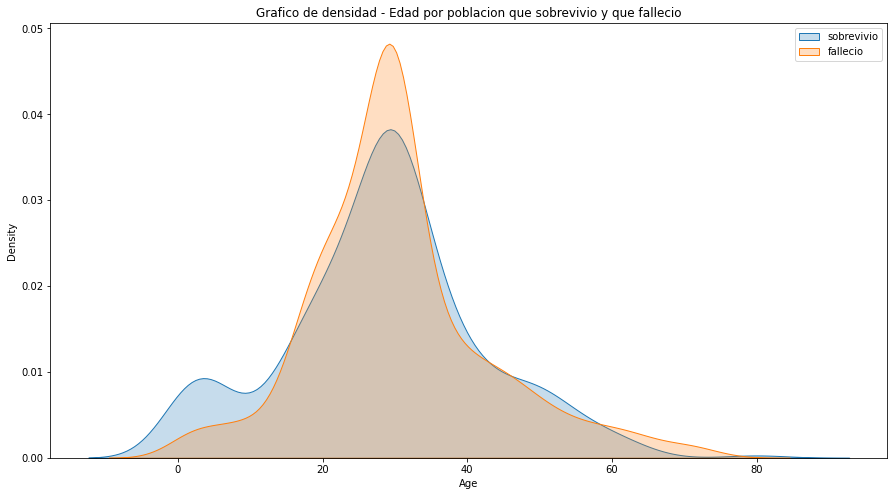

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["Age"][df.Survived == 1], shade=True)
sns.kdeplot(df["Age"][df.Survived == 0], shade=True)
plt.legend(['sobrevivio', 'fallecio'])
plt.title('Grafico de densidad - Edad por poblacion que sobrevivio y que fallecio')
plt.show()

**Relacion entre Fare y Survival**




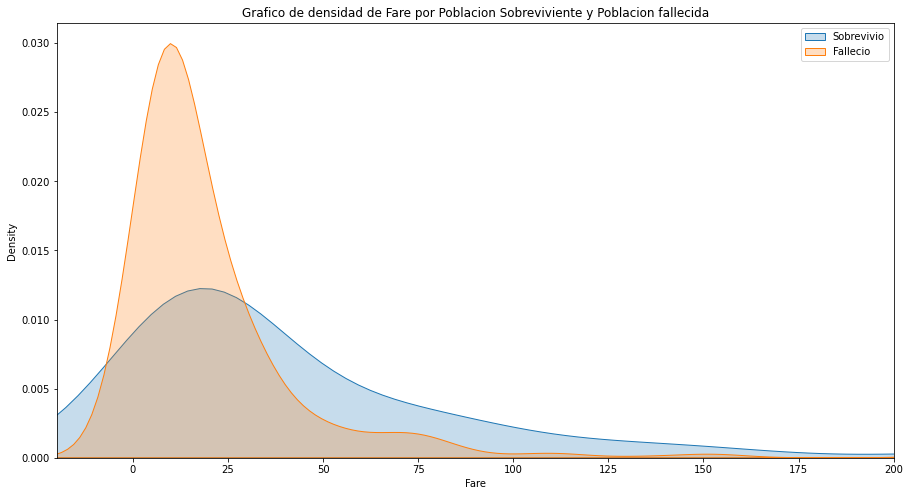

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["Fare"][df.Survived == 1], shade=True)
sns.kdeplot(df["Fare"][df.Survived == 0], shade=True)
plt.legend(['Sobrevivio', 'Fallecio'])
plt.title('Grafico de densidad de Fare por Poblacion Sobreviviente y Poblacion fallecida')
# el axis x esta limitado, pudiendo quedae outliers fuera 
plt.xlim(-20,200)
plt.show()

##### Box Plots

Un boxplot (diagrama de caja) es una forma estandarizada de mostrar la distribución de datos basada en un resumen de cinco números (“mínimo”, primer cuartil (Q1), mediana, tercer cuartil (Q3) y “máximo”) Muestra los valores outliers (atípicos). También ilustra si los datos son simétricos, como se encuentran agrupados y si están sesgados.

![alt text](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

Reference 
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
- https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


*Relacion entre Sex y Fare**

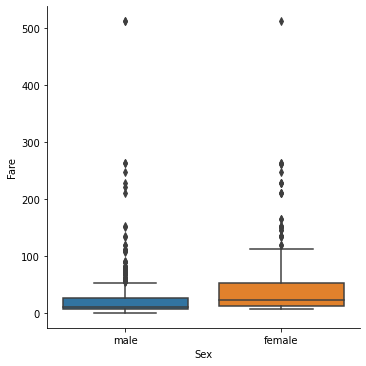

In [ ]:
sns.catplot(x="Sex", y="Fare", kind="box", data=df)

**Relacion Pclass y Age**

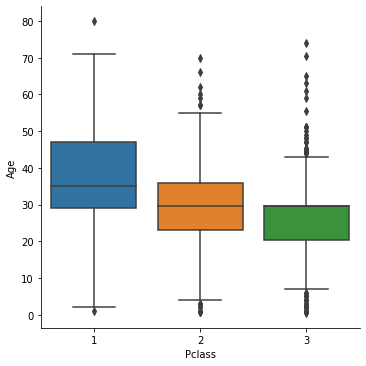

In [ ]:
sns.catplot(x="Pclass", y="Age", kind="box", data=df)

**Relacion AgeBucket y Fare**

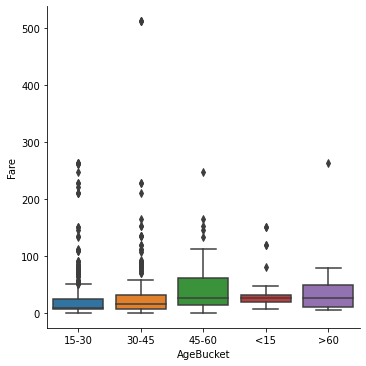

In [ ]:
sns.catplot(x="AgeBucket", y="Fare", kind="box", data=df)